In [3]:
import pandas as pd
import matplotlib.animation as anim
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate DataFrames

In [26]:
no_country2 = pd.read_csv('gazepoints/no_country_clip2_gazepoints.csv')
no_country2 = no_country2[no_country2['eyetracker_valid'] == 1]
no_country2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67976 entries, 0 to 68465
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              67976 non-null  int64  
 1   frame_num               67976 non-null  int64  
 2   shot_num                67976 non-null  int64  
 3   x                       67976 non-null  float64
 4   y                       67976 non-null  float64
 5   timestamp               67976 non-null  int64  
 6   subject                 67976 non-null  object 
 7   eyetracker_valid        67976 non-null  int64  
 8   in_frame                67976 non-null  int64  
 9   subject_valid_for_clip  67976 non-null  int64  
 10  film                    67976 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 6.2+ MB


In [5]:
no_country2['subject'].unique()

array(['B1', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17',
       'B18', 'B19', 'B2', 'B20', 'B21', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B9'], dtype=object)

In [6]:
def get_gazepoints_in_range(df, frame_start, frame_end):
  """
  Given a dataframe with a `frame_num` column, returns the rows that are
  within the range.

  Inputs
    df <Pandas.DataFrame>
      Pandas dataframe containing a `frame_num` column.
    frame_start <int>
      The start frame (inclusive).
    frame_end <int>
      The end frame (exclusive).
  Returns
    A subset of `df` with only the rows that falls in the specified range.
  """
  return df[
        (df['frame_num'] >= frame_start)
        & (df['frame_num'] < frame_end)
      ]

In [7]:
def generate_static_linegraphs(film_df):
  """
  For every subject, plot their gazepoints over time p
  """
  for subject in film_df['subject'].unique():
    subject_gazepoints = film_df[film_df['subject'] == subject]
    fig, ax = plt.subplots(figsize=(16,9))
    fig.suptitle(f'Subject {subject} Gazepoints for No Country Clip 2')
    ax.set(xlim=(0,1), ylim=(0,1))
    sns.lineplot(x='x', y='y', data=subject_gazepoints, sort=False)
    plt.savefig(f'lineplots/{subject}_nocountry2.png', dpi=300)

/tmp/ipykernel_8539/2813662879.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(16,9))


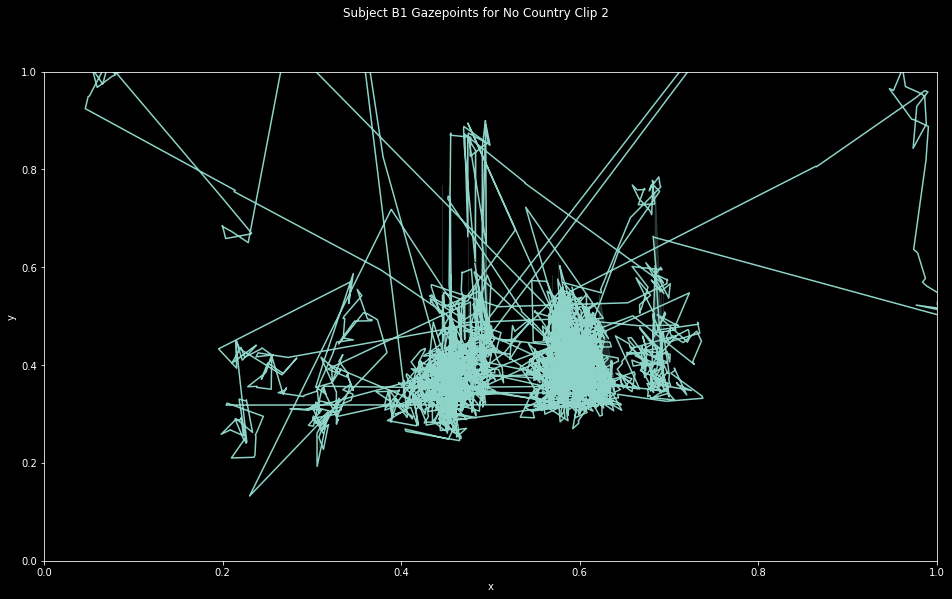

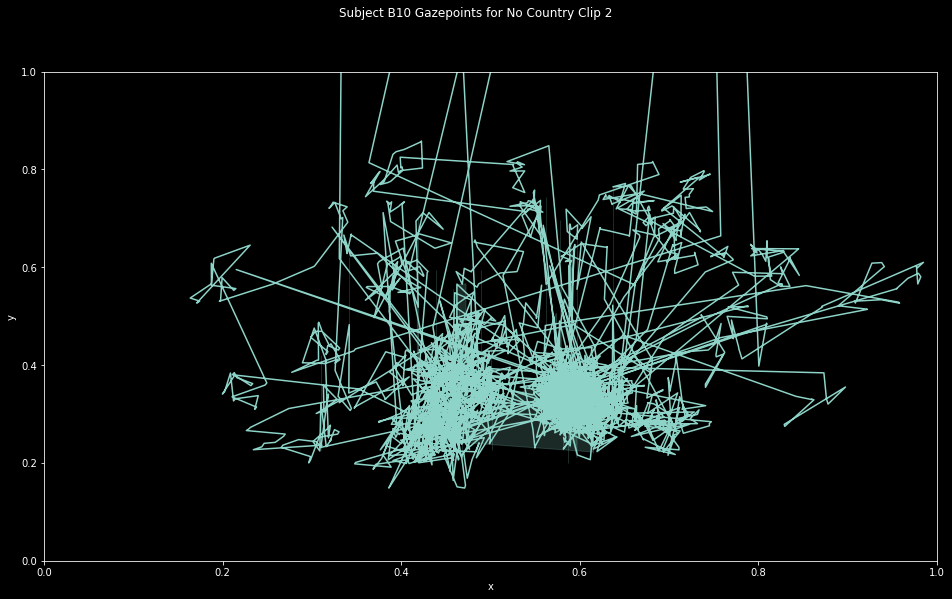

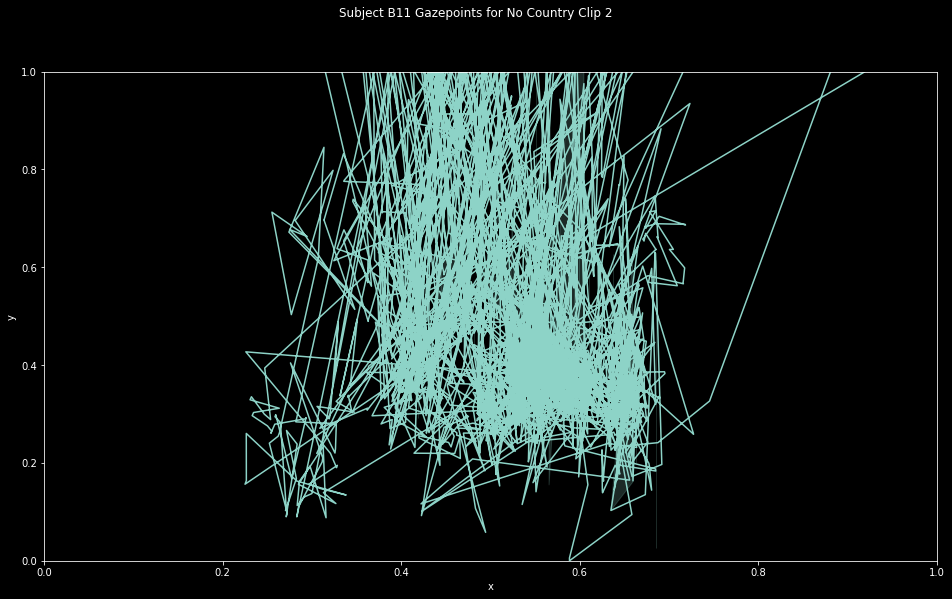

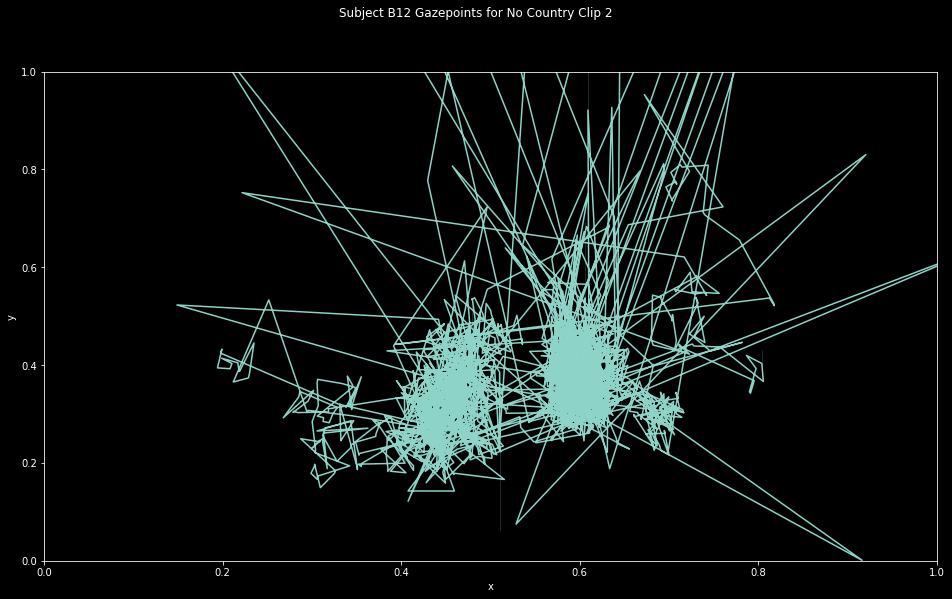

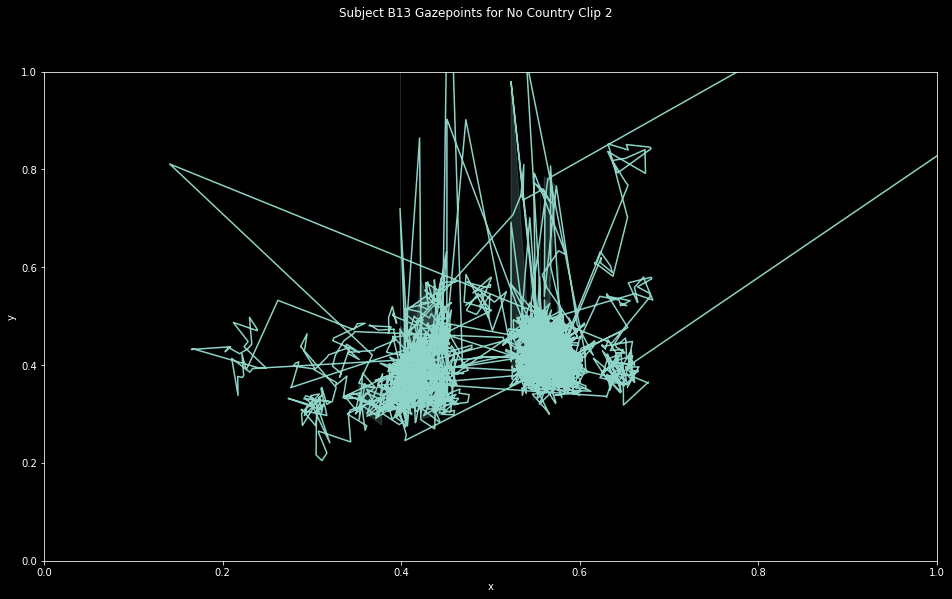

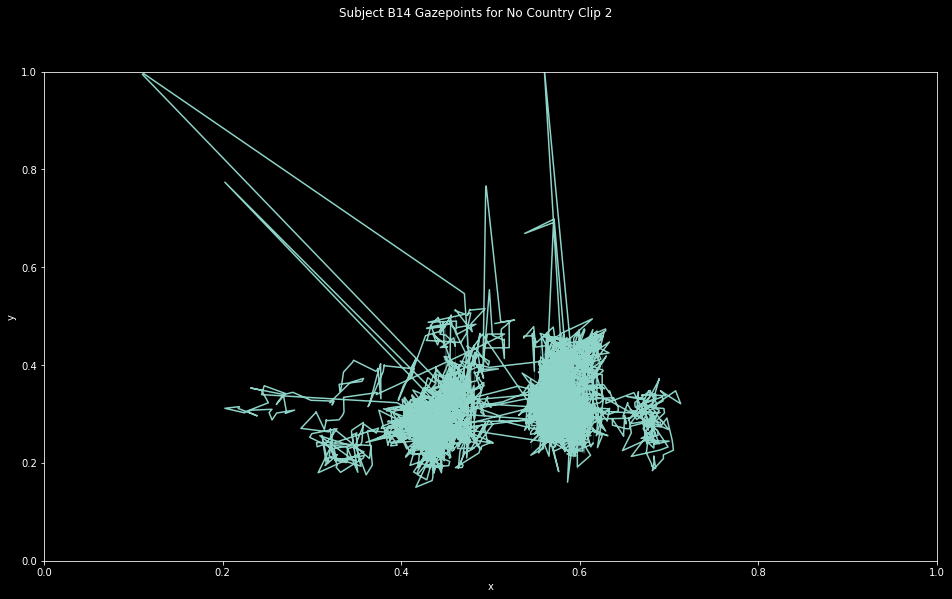

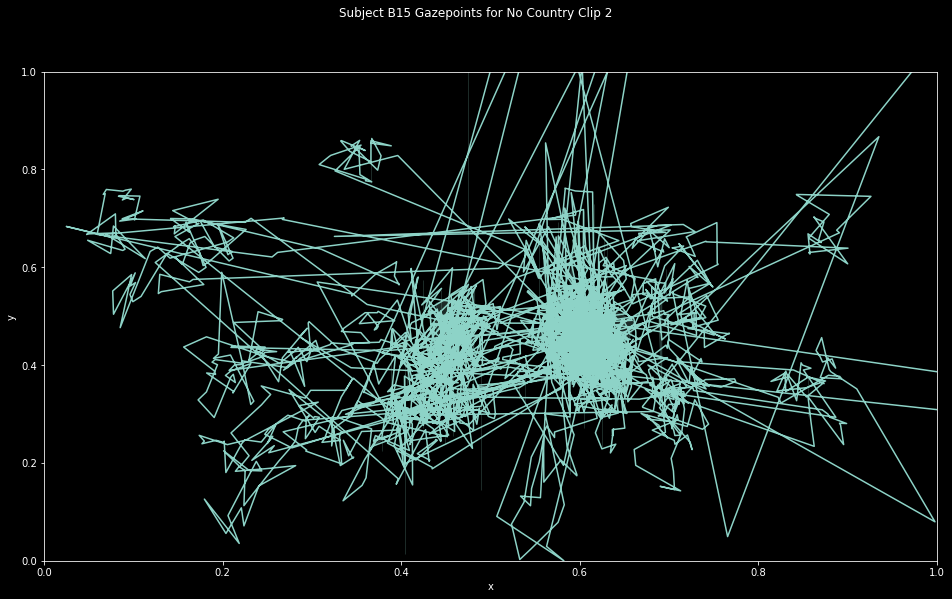

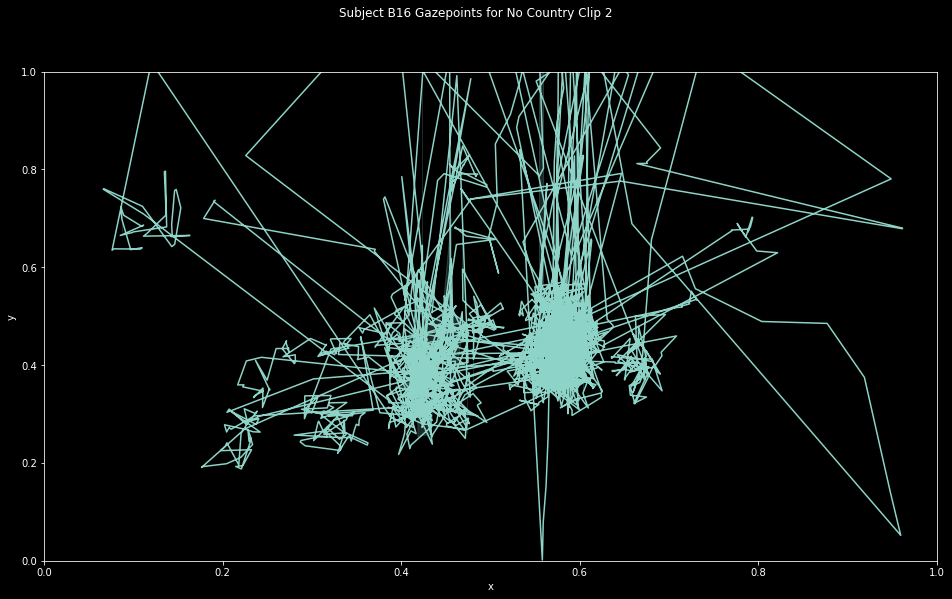

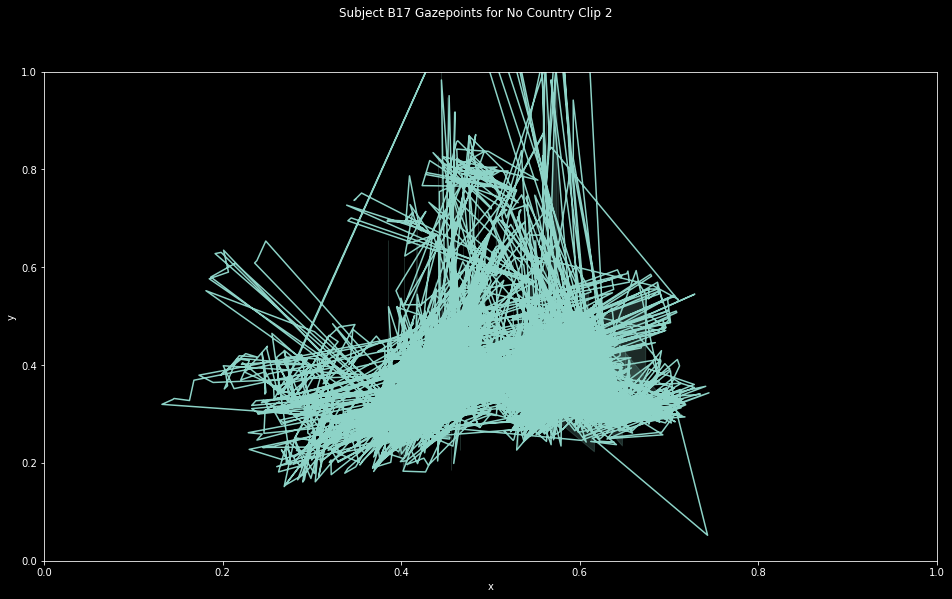

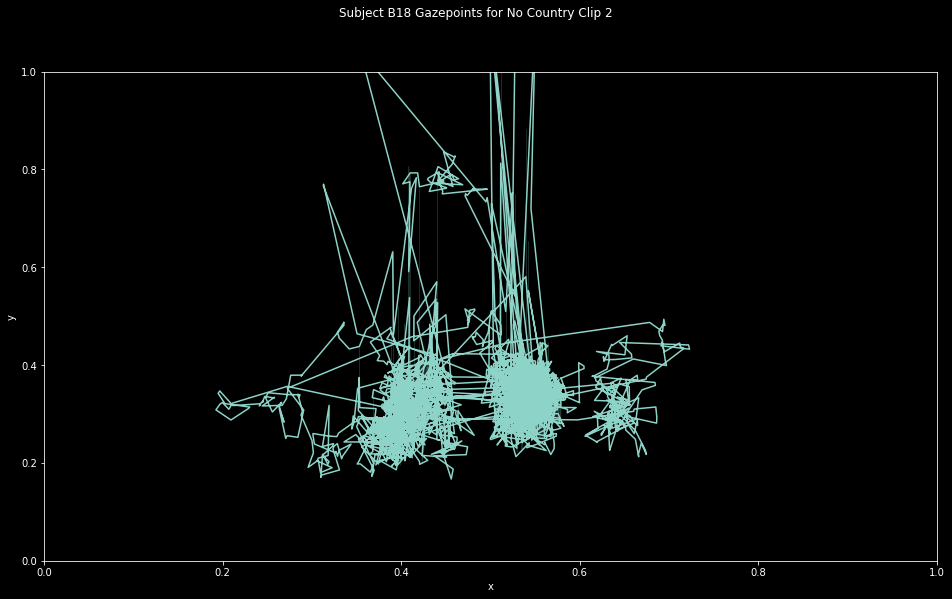

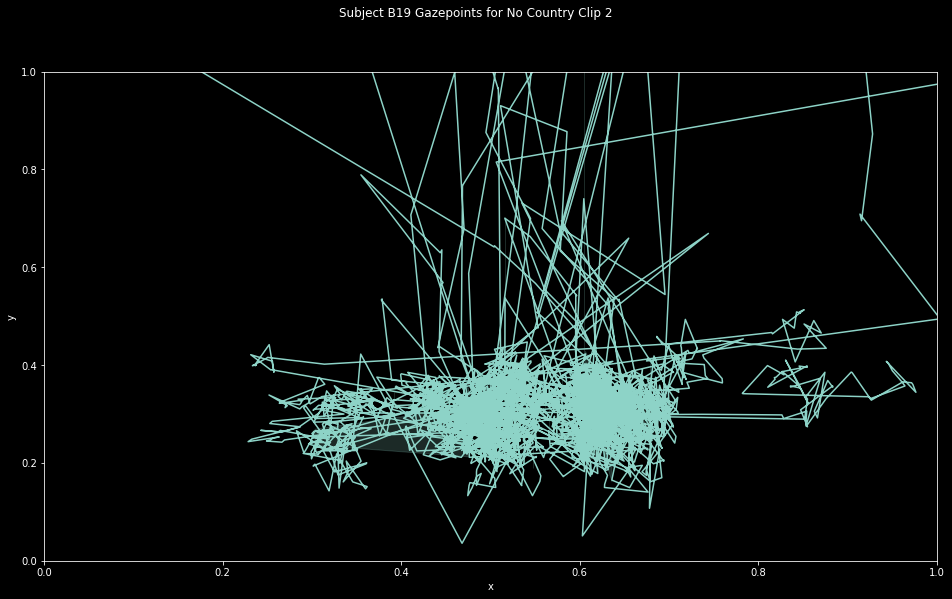

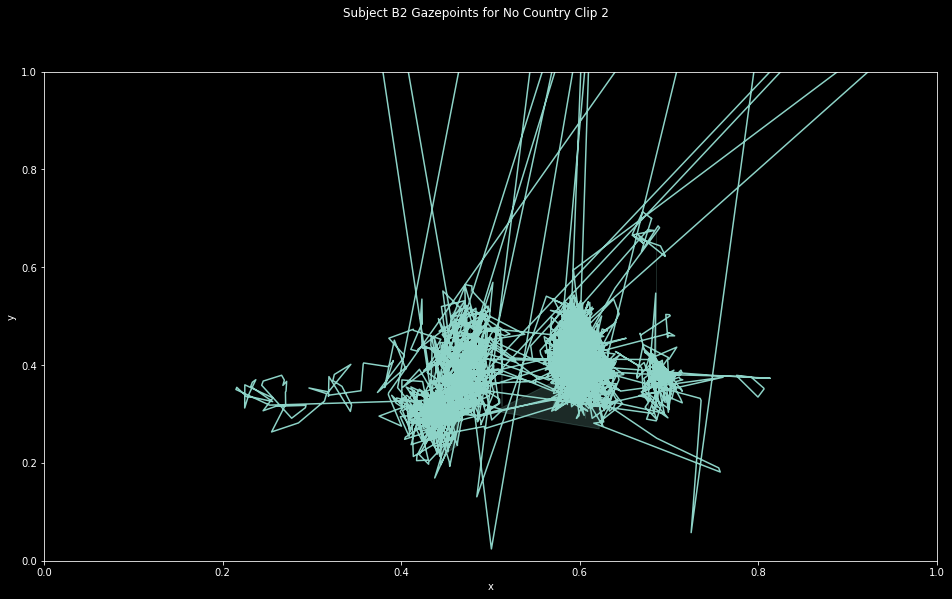

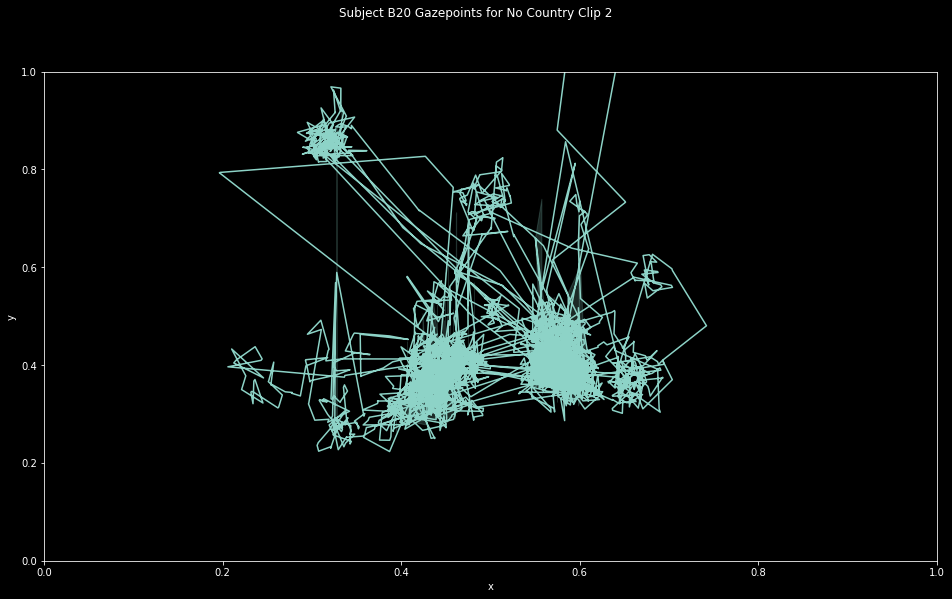

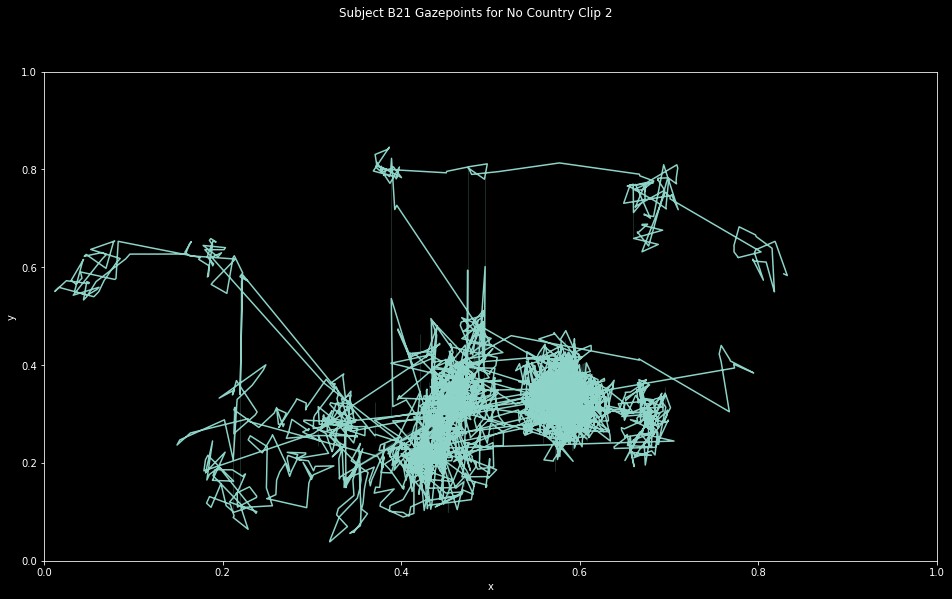

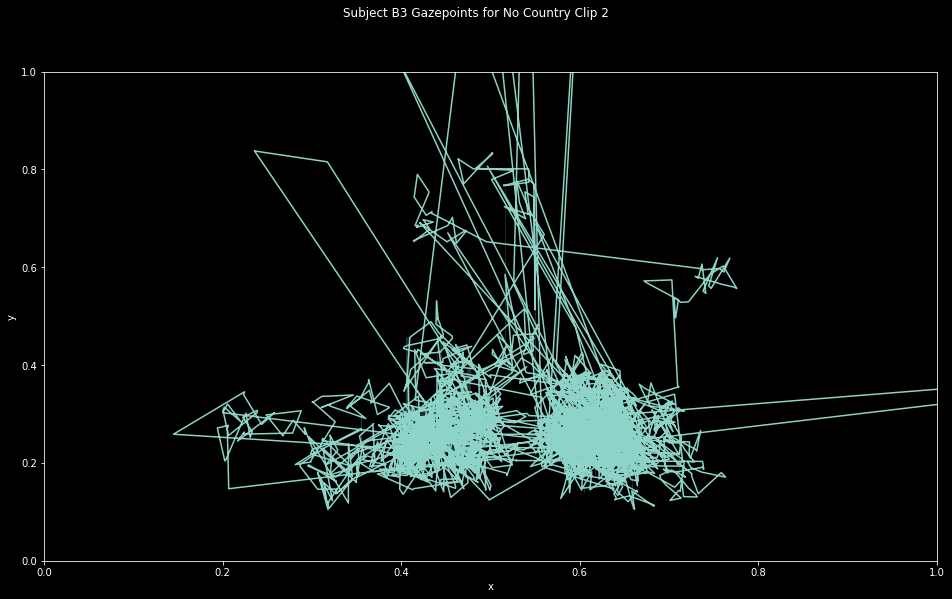

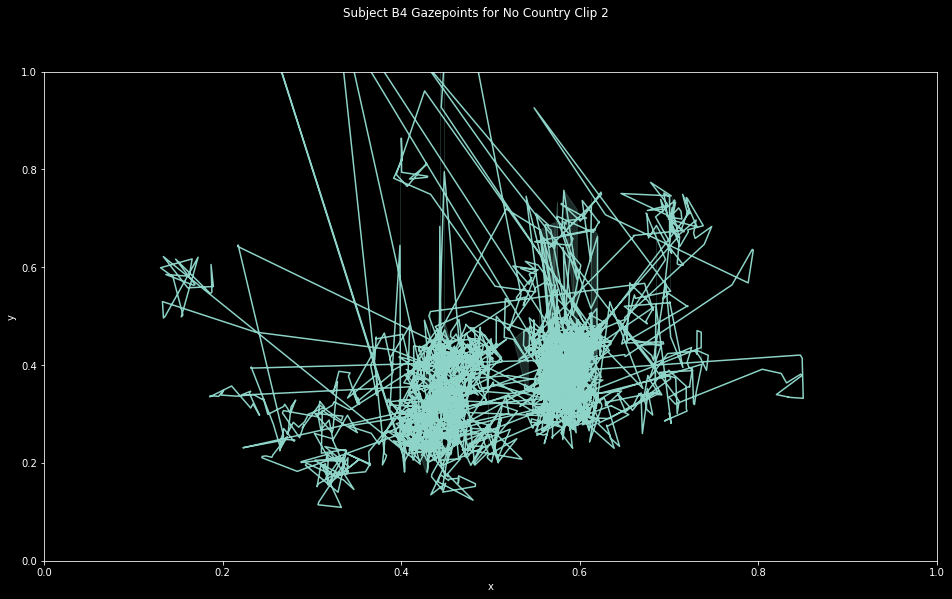

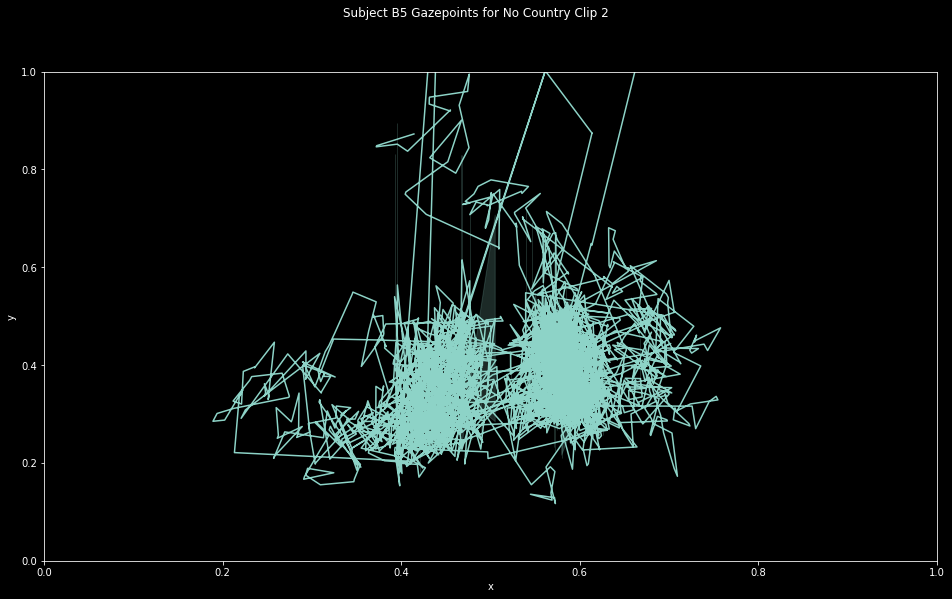

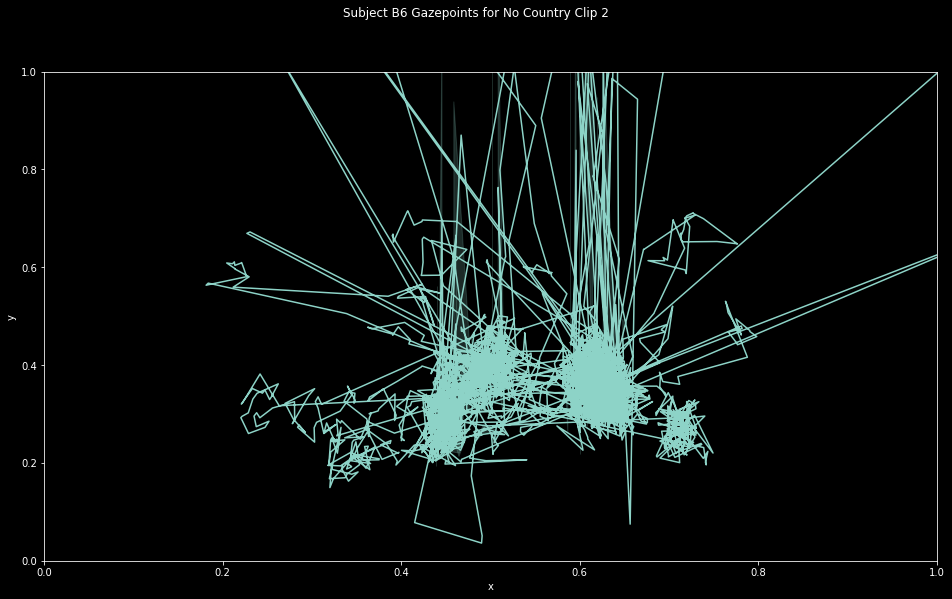

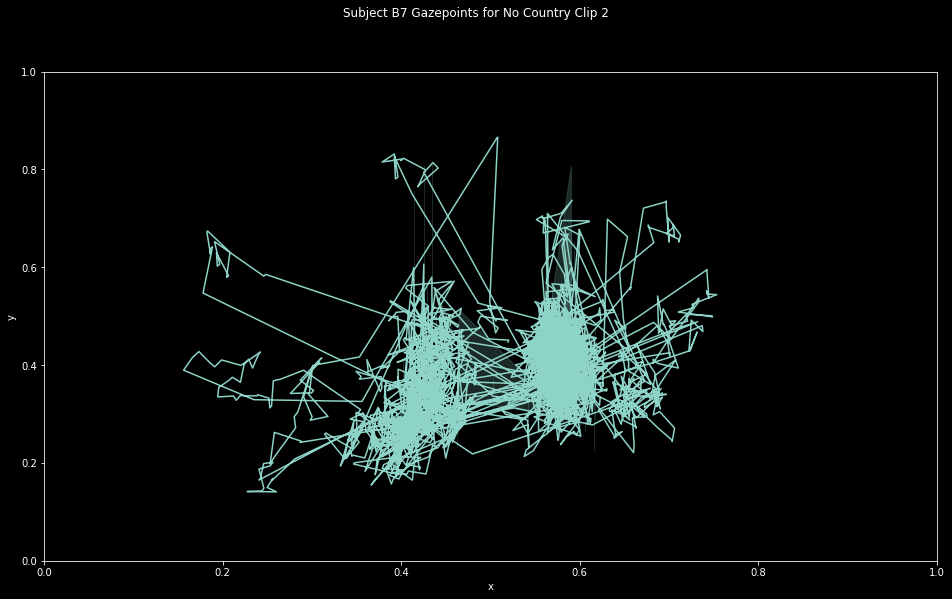

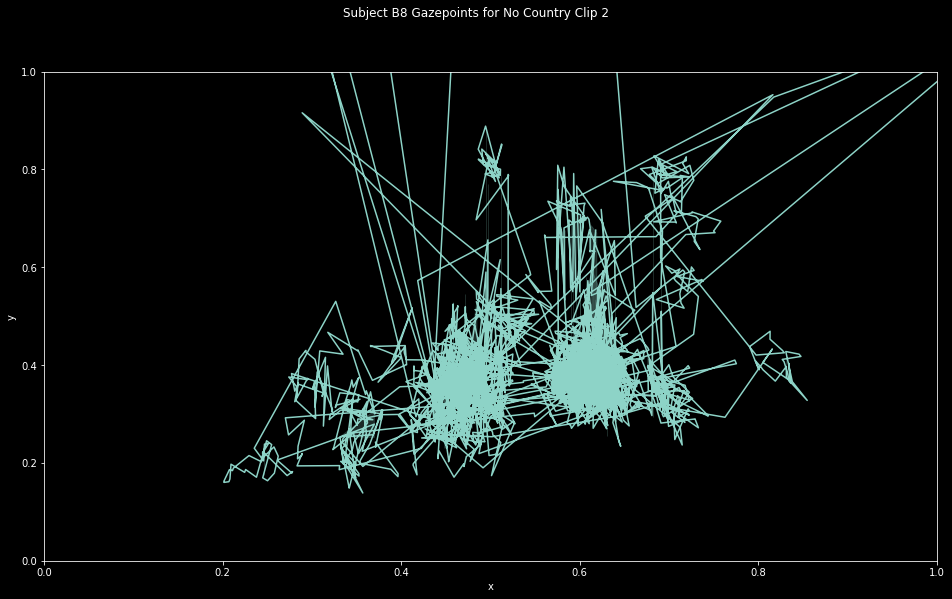

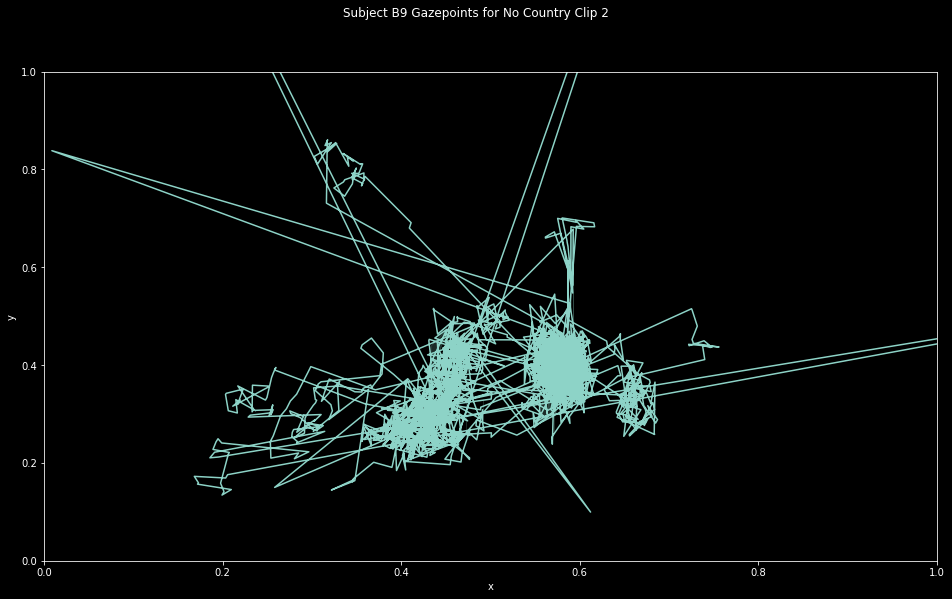

In [8]:
generate_static_linegraphs(no_country2)

In [45]:
def generate_static_fading_scatter(film_df):
  """
  For every subject, plot their gazepoints over time p
  """
  for subject in film_df['subject'].unique():
    subject_gazepoints = film_df[film_df['subject'] == subject]
    fig, ax = plt.subplots(figsize=(16,9))
    fig.suptitle(f'Subject {subject} Gazepoints for No Country Clip 2')
    ax.set(xlim=(0,1), ylim=(0,1))
    p = sns.scatterplot(x='x', y='y', data=subject_gazepoints,
      hue='frame_num', hue_norm=matplotlib.colors.Normalize(), palette='mako', cmap='gray', edgecolor='none')
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    plt.savefig(f'scatterplots/{subject}_nocountry2.png')

In [ ]:
generate_static_fading_scatter(no_country2)

In [105]:
def animate(gazepoints, i):
  data = gazepoints.iloc[i:i+1]
  p = sns.scatterplot(x='x', y='y', data=data,
    palette='mako', hue='frame_num', edgecolors='none')
  p.tick_params(labelsize=17)
  plt.setp(p.lines,linewidth=7)
  if i % 24 == 0:
    anim_fig.clf()
    anim_ax = plt.axes(xlim=(0,1),ylim=(0,1))

In [111]:
def animate_one(subject_gazepoints):
  Writer = anim.writers['ffmpeg']
  writer = Writer(fps=24, bitrate=1500)
  global anim_fig, anim_ax
  anim_fig, anim_ax = plt.subplots(figsize=(16,9))
  anim_ax.set_xlim(0,1)
  anim_ax.set_ylim(0,1)
  ani = anim.FuncAnimation(anim_fig,
    func = lambda x: animate(subject_gazepoints, x),
    frames = len(subject_gazepoints),
    interval = 10,
    repeat = True)
  ani.save('scatterplots/subject_1.gif', writer=writer)


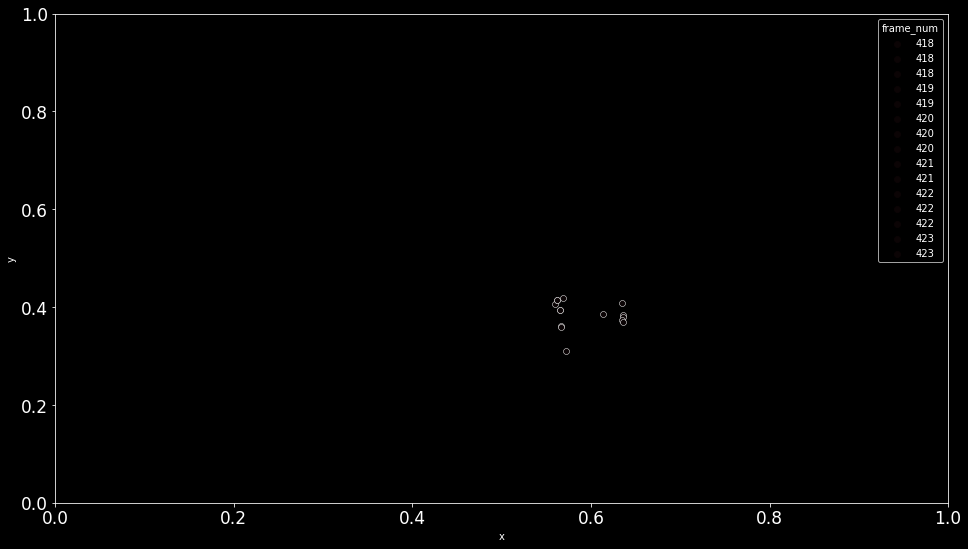

In [112]:
animate_one(no_country2[no_country2['subject'] == 'B1'][:1000])